# Лабораторная работа №5, 6210, Макарова М.К., Вариант 10

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sm
import scipy as sp
from prettytable import PrettyTable

Задание 1:

Решить нелинейное уравнение на указанном отрезке по следующему плану:
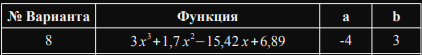

1. Построить график функции. Убедиться, что на указанном интервале
функция имеет единственный корень.
2. Проверить условия сходимости для каждого метода.
3. Вычислить с точностью до 0.001 значения корня.
Для метода половинного деления использовать формулу

   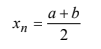

   Для метода хорд использовать формулу

   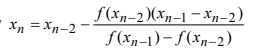

   Для метода Ньютона (касательных) 

   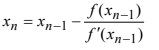

4. Стоп по условию 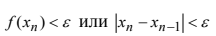

5. Вывести количество итераций.
6. Проверить найденный решения с помощью метода solve.

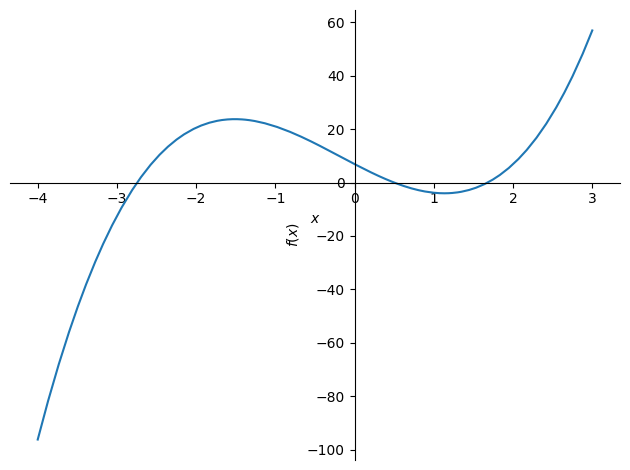

In [21]:
#строим график функции
x = sm.Symbol('x') #заменим х на символ
y = 3 * x**3 + 1.7 * x**2 - 15.42 * x + 6.89
a = -4
b = 3
sm.plot(y,(x,a,b));
#из графика видно, что уравнение имеет 3 кореня на указанном интервале

In [5]:
#проверяем условие на сходимость (метод половинного деления)
# f(a)*f(b) < 0
if(y.subs(x,a)*y.subs(x,b) < 0):
  print('Выполняется условие сходимости для метода половинного деления')
else:
    print('Не выполняется условие сходимости для метода половинного деления')

yp = sm.diff(sm.diff(y))

#проверяем условие на сходимость (метод хорд)
# f(a)"*f(a) != 0
if(yp.subs(x,a)*y.subs(x,a) != 0):
  print('Выполняется условие сходимости для метода хорд')
else:
    print('Не выполняется условие сходимости для метода хорд')

#проверяем условие на сходимость (метод Ньютона)
# f(x0)"*f(x0) < 0 (x0 = a или b)
if((yp.subs(x,a)*y.subs(x,a) > 0) | (yp.subs(x,b)*y.subs(x,b) > 0)):
  print('Выполняется условие сходимости для метода Ньютона')
else:
    print('Не выполняется условие сходимости для метода Ньютона')
    
#проверяем условие на сходимость (метод метод последовательных приближений)
#−2 < f ′(x)< 0
if ((sm.diff(y).subs(x, 1.67952976251581) > -2) and (sm.diff(y).subs(x, 1.67952976251581) < 0)):
    print('Выполняется условие сходимости для метода последовательных приближений')
else:
    print('Не выполняется условие сходимости для метода последовательных приближений')


Выполняется условие сходимости для метода половинного деления
Выполняется условие сходимости для метода хорд
Выполняется условие сходимости для метода Ньютона
Не выполняется условие сходимости для метода последовательных приближений


In [26]:
#метод половинного деления
def method1(a, b, f, E): # a, b - границы промежутка, E - точность
    table = PrettyTable(['i', 'x(n)'])
    X = (a+b)/2
    i = 0 # i - это количество итераций
    table.add_row([len(table._rows), X])
    while((b-a)/2 > E): #идём по циклу, пока не выполнится условие на точность
        if(f.subs(x, X) * f.subs(x, b) < 0): #проверяем f((a+b)/2)*f(b) < 0, тем самым выясняя на какой половине промежутка находится корень
            a = X                            #затем, сужаем границы, двимгаемся так дальше и в конце концов находим корень
        else:
            b = X
        i += 1
        X = (a+b)/2
        table.add_row([len(table._rows), X])
    print(table)
    return (X, i) #корень и кол-во итераций

In [27]:
#первым выводится само значение корня, затем кол-во итераций (корень, кол-во_итераций)
print(method1(-3, -2, y, 0.0001))
print(method1(0, 1, y, 0.0001))
print(method1(1, 2, y, 0.0001))
print(sm.solveset(y))

+----+-------------------+
| i  |        x(n)       |
+----+-------------------+
| 0  |        -2.5       |
| 1  |       -2.75       |
| 2  |       -2.625      |
| 3  |      -2.6875      |
| 4  |      -2.71875     |
| 5  |     -2.734375     |
| 6  |     -2.7421875    |
| 7  |    -2.74609375    |
| 8  |    -2.744140625   |
| 9  |   -2.7451171875   |
| 10 |   -2.74462890625  |
| 11 |  -2.744384765625  |
| 12 |  -2.7445068359375 |
| 13 | -2.74444580078125 |
+----+-------------------+
(-2.74444580078125, 13)
+----+------------------+
| i  |       x(n)       |
+----+------------------+
| 0  |       0.5        |
| 1  |       0.25       |
| 2  |      0.375       |
| 3  |      0.4375      |
| 4  |     0.46875      |
| 5  |     0.484375     |
| 6  |    0.4921875     |
| 7  |    0.49609375    |
| 8  |   0.498046875    |
| 9  |   0.4990234375   |
| 10 |  0.49853515625   |
| 11 |  0.498291015625  |
| 12 | 0.4981689453125  |
| 13 | 0.49822998046875 |
+----+------------------+
(0.49822998046875, 13)

In [30]:
#метод хорд
def method2(a, b, f, E):
    table = PrettyTable(['i', 'x(n)'])
    prev = b
    temp = a
    i = 0 # i - это количество итераций
    table.add_row([len(table._rows), temp])
    while(abs(prev - temp) > E): #идём по циклу, пока не выполнится условие на точность
        temp, prev = prev - (f.subs(x, prev) * (temp - prev)) / (f.subs(x, temp) - f.subs(x, prev)), temp #по формуле из методички (пункт 3, описанный в задании 1)
        i += 1
        table.add_row([len(table._rows), temp])
    print(table)
    return (temp, i) #корень и кол-во итераций

In [31]:
#первым выводится само значение корня, затем кол-во итераций (корень, кол-во_итераций)
print(method2(-3, -2, y, 0.0001))
print(method2(0, 1, y, 0.0001))
print(method2(1, 2, y, 0.0001))
print(sm.solveset(y))

+---+-------------------+
| i |        x(n)       |
+---+-------------------+
| 0 |         -3        |
| 1 | -2.62061668681983 |
| 2 | -2.72843372829161 |
| 3 | -2.74557792543720 |
| 4 | -2.74444471129247 |
| 5 | -2.74445438320891 |
+---+-------------------+
(-2.74445438320891, 5)
+---+-------------------+
| i |        x(n)       |
+---+-------------------+
| 0 |         0         |
| 1 | 0.642723880597015 |
| 2 | 0.526432913139593 |
| 3 | 0.495621343996571 |
| 4 | 0.498299005151160 |
| 5 | 0.498258017920617 |
+---+-------------------+
(0.498258017920617, 5)
+----+------------------+
| i  |       x(n)       |
+----+------------------+
| 0  |        1         |
| 1  | 1.35861423220974 |
| 2  | 4.18374765875290 |
| 3  | 1.40779574931808 |
| 4  | 1.45164452654007 |
| 5  | 1.80051969115822 |
| 6  | 1.64703771258965 |
| 7  | 1.67562597011470 |
| 8  | 1.67967038565690 |
| 9  | 1.67952917171762 |
| 10 | 1.67952976242671 |
+----+------------------+
(1.67952976242671, 10)
{-2.74445438901724, 0

In [33]:
#метод Ньютона
#за X0 принимаем a
def method3(a, f, E): 
    table = PrettyTable(['i', 'x(n)'])
    fp = sm.diff(f)
    prev = a
    temp = prev - f.subs(x, prev)/fp.subs(x, prev) #по формуле Xn = Xn-1 - f(Xn-1)/f'(Xn-1)
    i = 1 # i - это количество итераций
    table.add_row([len(table._rows), temp])
    while(abs(prev - temp) > E): #идём по циклу, пока не выполнится условие на точность
        temp, prev = temp - f.subs(x, temp)/fp.subs(x, temp), temp
        i += 1
        table.add_row([len(table._rows), temp])
    print(table)
    return (temp, i)

In [34]:
print(method3(-3, y, 0.0001))
print(method3(0, y, 0.0001))
print(method3(1.4, y, 0.0001))
print(sm.solveset(y))

+---+-------------------+
| i |        x(n)       |
+---+-------------------+
| 0 | -2.77338389310220 |
| 1 | -2.74489144217948 |
| 2 | -2.74445449106453 |
| 3 | -2.74445438901725 |
+---+-------------------+
(-2.74445438901725, 4)
+---+-------------------+
| i |        x(n)       |
+---+-------------------+
| 0 | 0.446822308690013 |
| 1 | 0.496973674699074 |
| 2 | 0.498257074526249 |
| 3 | 0.498257959834337 |
+---+-------------------+
(0.498257959834337, 4)
+---+------------------+
| i |       x(n)       |
+---+------------------+
| 0 | 1.84899713467049 |
| 1 | 1.70320068317186 |
| 2 | 1.68010635770435 |
| 3 | 1.67953011874253 |
| 4 | 1.67952976251595 |
+---+------------------+
(1.67952976251595, 5)
{-2.74445438901724, 0.498257959834759, 1.67952976251581}


In [35]:
#method of successive approximations
def method4(a, f, E):
    table = PrettyTable(['i', 'x(n)'])
    F = f + x
    prev = a
    temp = F.subs(x, prev)
    i = 1
    table.add_row([len(table._rows), temp])
    while (abs(prev - temp) > E):
        prev = temp
        temp = F.subs(x, prev)
        i += 1
        table.add_row([len(table._rows), temp])
    print(table)
    return (temp, i)


In [36]:
#print(method4(-3, y, 0.0001))
#print(method4(0, y, 0.0001))
#print(method4(1.4, y, 0.0001))

print(sm.solveset(y))

{-2.74445438901724, 0.498257959834759, 1.67952976251581}


**Задание 2:**

Решить систему нелинейных уравнений методом Ньютона с точностью до 0.001
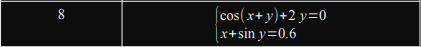


1. Построить графики функций.
2. Определите начальное приближение исходя из графиков.
3. Вычислить производные, составить матрицу Якоби. (Вывести на экран)
4. Составить систему линейных уравнений относительно приращений x и y. (вывести на экран)
5. Решить линейную систему методом Крамера. (вывести на экран решение)
6. Составить итерационную систему. (вывести на экран)
7. Стоп по условию 
   
   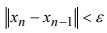

8. Вывести количество итераций.
9. Проверить полученные решения подстановкой и сравнить с решениями функцией Питон (nonlinsolve)

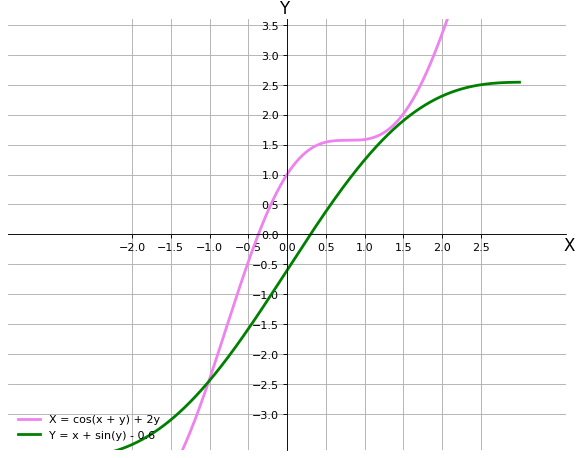

In [46]:
#создание объектов артборда и холста
plt.figure(figsize=(9, 7), dpi=80)
ax = plt.subplot(111)

#мы решили удалить правую и верхнюю прямоугольные границы
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#установить направление данных на координатной оси
#0 согласуется с нашей общей декартовой системой координат, 1 - противоположность
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

#подписываем ось Х и ось Y
ax.set_xlabel("X", fontsize=15, labelpad=120)
ax.set_ylabel("Y", fontsize=15, labelpad=140, rotation = 0)
ax.xaxis.set_label_coords(1.005, 0.495)
ax.yaxis.set_label_coords(0.495, 1.005)

#подготовить данные, использовать распаковку последовательности
X = np.linspace(-3, 3, 1200, endpoint=True)
Y = np.linspace(-3, 3, 1200, endpoint=True)
#сами функции:
F1 = np.cos(X+Y) + 2* Y
F2 = X + np.sin(Y) - 0.6

#Делаем построения графиков:
plt.plot(X, F1, color="violet", linewidth=2.5, linestyle="-", label="X = cos(x + y) + 2y")
plt.plot(X, F2, color="green", linewidth=2.5, linestyle="-", label="Y = x + sin(y) - 0.6")


#Устанавливаем диапазон осей
plt.xlim(X.min() * 1.2, X.max() * 1.2)
plt.ylim(Y.min() * 1.2, Y.max() * 1.2)

plt.xticks(np.arange(-2, 3, 0.5)) #метка на оси X
plt.yticks(np.arange(-3, 4, 0.5)) #метка на оси y

plt.legend(loc='lower left', frameon=False) #добавляем легенду
plt.grid() #добавляем сетку
plt.show()

#мы можем найти начальное приближение - это пересечение графиков; приблизительно (-0.25; 0.5)

In [38]:
y = sm.Symbol('y') #заменим y на символ

In [39]:
#приводим уравнения к общему виду
f1 = sm.cos(x + y) + 2*y
f2 = x + sm.sin(y) - 0.6

In [40]:
def Newton2(f1, f2, a, b, E):
    #считаем матрицу Якоби
    f1x = sm.diff(f1, x) # df1(x,y)/dx
    f2x = sm.diff(f2, x) # df2(x,y)/dx
    f1y = sm.diff(f1, y) # df1(x,y)/dy
    f2y = sm.diff(f2, y) # df2(x,y)/dy
    print("Матрица Якоби:")
    print(f1x,"     ", f1y)
    print(f2x,"      ", f2y)

    #начальное приближение
    xp, xt = a, a
    yp, yt = b, b

    #подставляем значения начального приближения в элементы матрицы Якоби
    a11 = sm.N(f1x.subs([(x,xt),(y,yt)]))
    a12 = sm.N(f1y.subs([(x,xt),(y,yt)]))
    a21 = sm.N(f2x.subs([(x,xt),(y,yt)]))
    a22 = sm.N(f2y.subs([(x,xt),(y,yt)]))
    #и получаем матрицу уже со значениями (см. рисунок 1, он в самом низу работы; мы получили множимое на данном этапе)

    b1 = sm.N(-f1.subs([(x,xt),(y,yt)])) # находим -f1(a,b)
    b2 = sm.N(-f2.subs([(x,xt),(y,yt)])) # находим -f2(a,b)
    #(см. рисунок 1) на данном этапе мы нашли произведение

    xd, yd = func(a11, a12, a21, a22, b1, b2) #ищем дельта x и дельта y (ищем множитель, см. рисунок 1)
    xt, yt, xp, yp = xt + xd, yt + yd, xt, yt
    i = 1 #кол-во итераций
    print("\nНачальное приближение:")
    print("x0 =", xp)
    print("y0 =", yp)
    print("\nx0 delta =", xd)
    print("y0 delta =", yd)
    print("x"+str(i), "=", xt)
    print("y"+str(i), "=", yt)
    while(abs(xt-xp) > E): #идём по циклу, пока не выполнится условие на точность
        xd, yd = func(f1x.subs([(x,xt),(y,yt)]), f1y.subs([(x,xt),(y,yt)]),
                       f2x.subs([(x,xt),(y,yt)]), f2y.subs([(x,xt),(y,yt)]),
                      -f1.subs([(x,xt),(y,yt)]), -f2.subs([(x,xt),(y,yt)]))
        xt, yt, xp, yp = xt + xd, yt + yd, xt, yt
        print("x"+str(i)+" delta =", xd)
        print("y"+str(i)+" delta =", yd)
        i += 1
        print("x"+str(i), "=", xt)
        print("y"+str(i), "=", yt)
    return (xt, yt, i)

In [41]:
def func(a11,a12,a21,a22,b1,b2):
    d = a11 * a22 - a21 * a12
    return ((b1 * a22 - b2 * a12)/d, (a11 * b2 - a21 * b1)/d)

In [44]:
print("\nРешение системы: ", Newton2(f1,f2, -0.25, 0.5, 0.0001))
print("Проверка: ", sm.nsolve((f1,f2),(x,y),(-0.25, 0.5)))

Матрица Якоби:
-sin(x + y)       2 - sin(x + y)
1        cos(y)

Начальное приближение:
x0 = -0.25
y0 = 0.5

x0 delta = 1.20695248932380
y0 delta = -0.953047683771646
x1 = 0.956952489323804
y1 = -0.453047683771646
x1 delta = 0.0487843885747052
y1 delta = 0.0355581084390518
x2 = 1.00573687789851
y2 = -0.417489575332594
x2 delta = -0.00163470388947657
y2 delta = 0.00149298879379061
x3 = 1.00410217400903
y3 = -0.415996586538803
x3 delta = -3.37993764817993e-7
y3 delta = -1.23967904366474e-7
x4 = 1.00410183601527
y4 = -0.415996710506707

Решение системы:  (1.00410183601527, -0.415996710506707, 4)
Проверка:  Matrix([[1.00410183601522], [-0.415996710506663]])


Рисунок 1

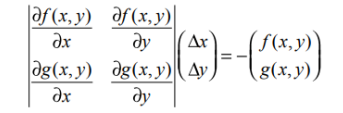